In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
x_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
num_labels=len(np.unique(y_train))
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [ ]:
shape1=x_train.shape[1]
shape2=x_train.shape[2]
x_train=x_train.reshape(-1, shape1,shape2,1).astype('float32')
x_test=x_test.reshape(-1, shape1,shape2,1).astype('float32')
x_train=x_train/255.
x_test=x_test/255.

In [ ]:
input_shape=(shape1,shape2,1)
batch_size=64
kernel_size=3
pool_size=2
filters=64
dropout=0.3

In [ ]:
model=Sequential()
model.add(Conv2D(filters=filters,kernel_size=kernel_size,activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,kernel_size=kernel_size,activation='relu'))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,kernel_size=kernel_size,activation='relu'))
model.add(Flatten())
model.add(Dropout(dropout))
model.add(Dense(num_labels, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dropout (Dropout)            (None, 576)               0

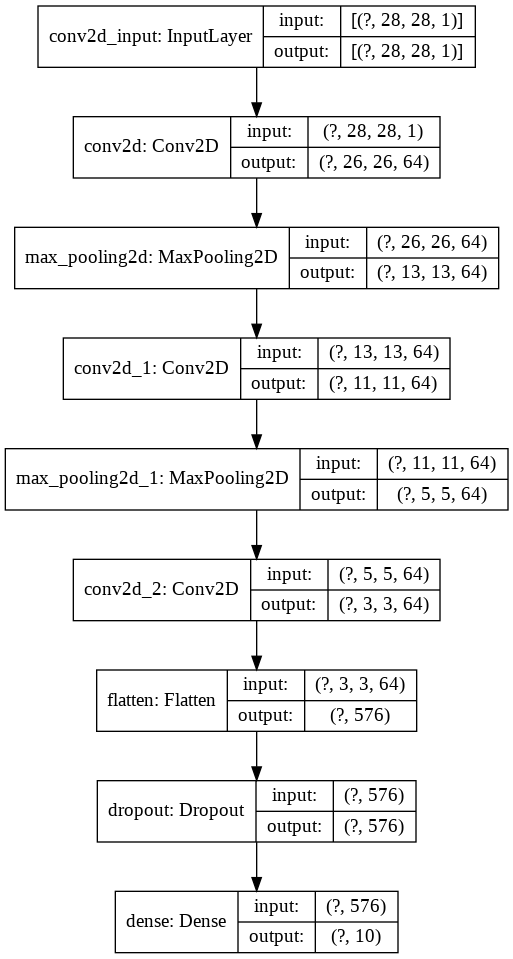

In [ ]:
plot_model(model,show_shapes=True)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model.fit(x_train,y_train,epochs=30,batch_size=64)
results=model.evaluate(x_test,y_test)
print(results)

Epoch 1/30
938/938 [==============================] - 3s 4ms/step - loss: 0.2081 - accuracy: 0.9356
Epoch 2/30
938/938 [==============================] - 3s 4ms/step - loss: 0.0641 - accuracy: 0.9808
Epoch 3/30
938/938 [==============================] - 3s 4ms/step - loss: 0.0450 - accuracy: 0.9860
Epoch 4/30
938/938 [==============================] - 3s 4ms/step - loss: 0.0385 - accuracy: 0.9878
Epoch 5/30
938/938 [==============================] - 3s 4ms/step - loss: 0.0301 - accuracy: 0.9907
Epoch 6/30
938/938 [==============================] - 3s 4ms/step - loss: 0.0258 - accuracy: 0.9919
Epoch 7/30
938/938 [==============================] - 3s 4ms/step - loss: 0.0235 - accuracy: 0.9923
Epoch 8/30
938/938 [==============================] - 3s 4ms/step - loss: 0.0203 - accuracy: 0.9934
Epoch 9/30
938/938 [==============================] - 3s 4ms/step - loss: 0.0175 - accuracy: 0.9943
Epoch 10/30
938/938 [==============================] - 3s 4ms/step - loss: 0.0153 - accuracy: 0.9951

API 버전

In [ ]:
import numpy as np
from keras.layers import Dense, Dropout, Input
from keras.models import Model

x=Input(shape=input_shape)
h=Conv2D(filters=filters,kernel_size=kernel_size,activation='relu')(x)
h=MaxPooling2D()(h) #maxpooling2D의 default는 (2,2)임
h=Conv2D(filters=filters,kernel_size=kernel_size,activation='relu')(h)
h=MaxPooling2D()(h) #maxpooling2D의 default는 (2,2)임
h=Conv2D(filters=filters,kernel_size=kernel_size,activation='relu')(h)
h=Flatten()(h)
h=Dropout(dropout)(h)
out=Dense(num_labels,activation='softmax')(h)


model=Model(inputs=x,outputs=out)
model.summary()
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model.fit(x_train,y_train,epochs=30,batch_size=64)
score=model.evaluate(x_test,y_test)
print(score)

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)              